## Tema de la BD: 
Consumo cultural en los jóvenes cubanos. Los datos fueron obtenidos mediante la realización de una encuesta.

### Integrantes:
- Ariadna Velázquez Rey  C311
- Lia Stephanie López Rosales  C312
- Raidel Miguel Cabellud Lizaso  C311

## Importación de las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint
from sklearn.decomposition import PCA
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



ModuleNotFoundError: No module named 'statsmodels'

## 1. Carga de datos

In [ ]:
archivo = './Consumo_Cultural_en_Cuba.xlsx'  # Ruta al archivo proporcionado
df = pd.read_excel(archivo)

## 2. Normalización de "Géneros musicales favoritos"

In [ ]:
# Función para separar y normalizar los géneros musicales
def normalizar_generos(df, columna, separador=','):
    # Crear una lista de listas con los géneros separados
    generos_separados = df[columna].dropna().apply(lambda x: [g.strip() for g in x.split(separador)])
    
    # Desplegar la lista y crear un DataFrame
    generos_planos = list(chain(*generos_separados))
    genero_frecuencia = pd.Series(generos_planos).value_counts().reset_index()
    genero_frecuencia.columns = ['Genero', 'Frecuencia']
    
    return genero_frecuencia

In [ ]:
# Aplicar la normalización
df_generos_normalizados = normalizar_generos(df, 'Géneros musicales favoritos')
print("Generos musicales normalizados:")
print(df_generos_normalizados['Genero'].value_counts())

Generos musicales normalizados:
Genero
Pop                  1
Alternative.         1
Folk                 1
kpop                 1
pop                  1
Country              1
Clásica              1
Indie                1
Jrock                1
Dark wave            1
post punk            1
Lo-Fi                1
new wave             1
Rock                 1
Repartero            1
metal                1
lo-fi                1
darkwave             1
synth-pop            1
post-punk            1
Regional mexicano    1
trova                1
rap                  1
Balada               1
Reparto              1
rock                 1
Jpop                 1
Bachata              1
Reggaetón            1
Hip-Hop              1
Jazz                 1
Blues                1
Trap                 1
Experimental         1
Trova                1
Funk                 1
EDM                  1
Rumba                1
Kpop                 1
R&B                  1
                     1
Alternative       

## 3. Normalización de categorías similares en columnas

In [ ]:

# Limpieza y normalización de la columna
df['Facultad en que estudias'] = df['Facultad en que estudias'].str.strip().str.lower()

# Función de agrupamiento corregida
def categorizar_facultad(facultad):
    ciencias_exactas = ['matcom', 'instec', 'física', 'mecánica']
    ciencias_naturales = ['biología', 'geografía', 'cultura física', 'química', 'ingeniería química']
    humanidades = ['fhs', 'flex', 'fcom', 'psicología', 'artes y letras', 'derecho']
    gestion = ['contabilidad y finanzas', 'economía', 'ftur', 'ingeniería civil', 'industrial']
    creatividad = ['isdi', 'artes visuales', 'famca', 'arquitectura']
    
    if facultad in ciencias_exactas:
        return 'Ciencias Exactas'
    elif facultad in ciencias_naturales:
        return 'Ciencias Naturales'
    elif facultad in humanidades:
        return 'Humanidades'
    elif facultad in gestion:
        return 'Gestión'
    elif facultad in creatividad:
        return 'Creatividad'
    else:
        return 'Otros'

# Aplicar la función al DataFrame
df['Categoría Facultad'] = df['Facultad en que estudias'].apply(categorizar_facultad)

# Verificar los resultados
print(df[['Facultad en que estudias', 'Categoría Facultad']].value_counts())

# Listar valores únicos para detectar errores
print(df['Facultad en que estudias'].unique())


Facultad en que estudias                      Categoría Facultad
matcom                                        Ciencias Exactas      30
fcom                                          Humanidades           25
fhs                                           Humanidades           15
biología                                      Ciencias Naturales    10
ingeniería química                            Ciencias Naturales     8
derecho                                       Humanidades            7
psicología                                    Humanidades            6
contabilidad y finanzas                       Gestión                6
industrial                                    Gestión                6
flex                                          Humanidades            5
química                                       Ciencias Naturales     5
instec                                        Ciencias Exactas       5
enrique cabrera                               Otros                  4
ciencias soc

Categoría Facultad
Humanidades           61
Ciencias Exactas      40
Ciencias Naturales    26
Otros                 24
Gestión               16
Creatividad            5
Name: count, dtype: int64


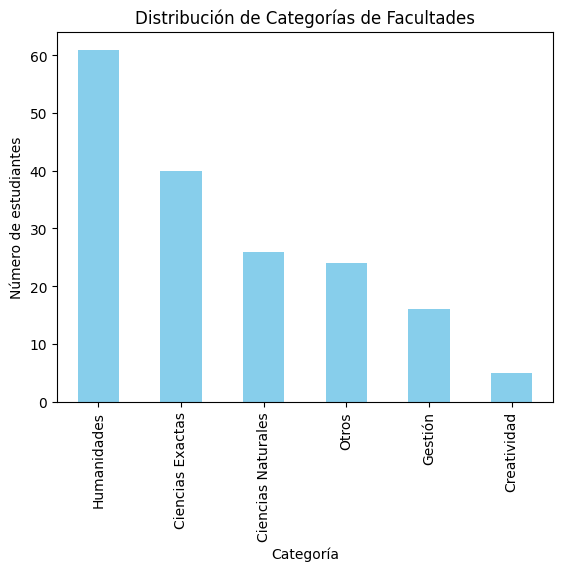

In [ ]:
# Conteo por categoría
conteo_categorias = df['Categoría Facultad'].value_counts()
print(conteo_categorias)

# Visualización
conteo_categorias.plot(kind='bar', title='Distribución de Categorías de Facultades', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Número de estudiantes')
plt.show()


               Género  Frecuencia  Proporción
7                 pop         105    0.195531
0                rock          81    0.150838
10          reggaetón          52    0.096834
1             hip-hop          49    0.091248
16               jazz          32    0.059590
5               blues          31    0.057728
2                trap          28    0.052142
4        experimental          26    0.048417
17              trova          26    0.048417
11               funk          16    0.029795
3                 edm          12    0.022346
28              rumba          10    0.018622
15               kpop           8    0.014898
6         alternative           8    0.014898
24              indie           5    0.009311
14                r&b           4    0.007449
12                rap           4    0.007449
30                              4    0.007449
27           corridos           3    0.005587
26              metal           3    0.005587
29              salsa           2 

/tmp/ipykernel_29040/1738556093.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_generos, x='Proporción', y='Género', palette='viridis')


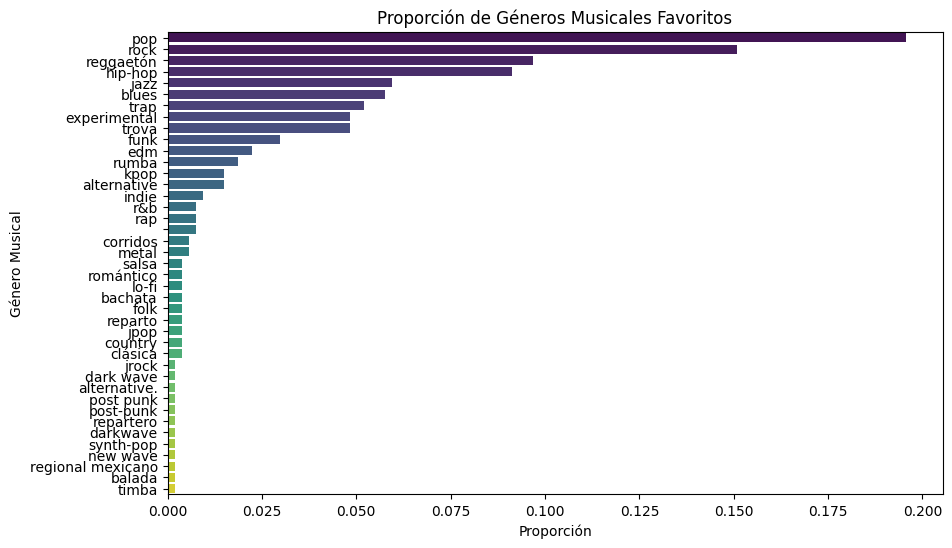

In [ ]:
# Normalización de la columna "Géneros musicales favoritos"
df['Géneros musicales favoritos'] = df['Géneros musicales favoritos'].str.lower().str.strip()

# Separar géneros por comas y contar frecuencias
from collections import Counter

# Crear una lista con todos los géneros
generos = df['Géneros musicales favoritos'].dropna().str.split(',').explode().str.strip()

# Contar frecuencias
conteo_generos = Counter(generos)

# Crear un DataFrame con los resultados
df_generos = pd.DataFrame(conteo_generos.items(), columns=['Género', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Calcular proporciones
df_generos['Proporción'] = df_generos['Frecuencia'] / df_generos['Frecuencia'].sum()

# Mostrar los géneros más frecuentes
print(df_generos)

# Visualización de las proporciones
plt.figure(figsize=(10, 6))
sns.barplot(data=df_generos, x='Proporción', y='Género', palette='viridis')
plt.title('Proporción de Géneros Musicales Favoritos')
plt.xlabel('Proporción')
plt.ylabel('Género Musical')
plt.show()


## 4. Exploración de datos

- ### Inspección inicial

Información general del dataset:

                      Marca temporal  Qué edad tienes?
count                            172        172.000000
mean   2024-07-08 04:46:52.402575872         20.104651
min       2024-07-07 09:37:08.497000         17.000000
25%    2024-07-07 11:09:35.190500096         19.000000
50%    2024-07-07 13:52:34.668499968         20.000000
75%    2024-07-08 06:32:28.616750080         21.000000
max       2024-07-24 11:45:22.526000         26.000000
std                              NaN          1.506548


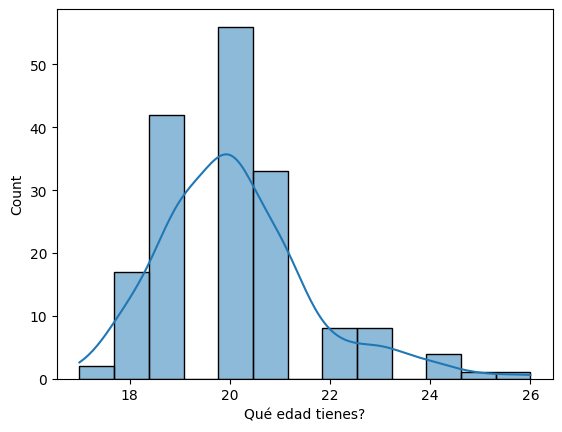

In [ ]:
print(df.describe())
sns.histplot(df['Qué edad tienes?'], kde=True)
plt.show()

Primeras filas del dataset:

In [ ]:
print(df.head())

           Marca temporal Universidad en que estudias  \
0 2024-07-07 09:37:08.497                          UH   
1 2024-07-07 09:43:45.764                          UH   
2 2024-07-07 09:56:11.729                          UH   
3 2024-07-07 10:02:35.432                          UH   
4 2024-07-07 10:08:25.765                         ISA   

  Facultad en que estudias  Qué edad tienes?  \
0                   matcom                22   
1                   matcom                20   
2                      fhs                20   
3                 biología                20   
4                    famca                18   

  Vertiente cultural que más consumes             Géneros musicales favoritos  \
0                              Música                           rock, hip-hop   
1                              Música  rock, hip-hop, trap, edm, experimental   
2                              Música        hip-hop, trap, edm, experimental   
3                              Música       

- ### Verificar valores nulos

In [ ]:
print(df.isnull().sum())

Marca temporal                                    0
Universidad en que estudias                       1
Facultad en que estudias                          1
Qué edad tienes?                                  0
Vertiente cultural que más consumes               0
Géneros musicales favoritos                       4
Cantante o grupo favorito                        40
Plataforma donde más consumes música              1
Géneros cinematográficos favoritos                3
Plataforma donde mas consumes cine               10
Película favorita                                46
Gèneros literarios favoritos                      8
Plataforma donde más consumes literatura         14
Escritor favorito                                67
Arte plástica favorita                           27
Plataforma donde más consumes artes plásticas    23
Artista plástico favorito                        84
Categoría Facultad                                0
dtype: int64


## 5. Medidas de tendencia central (media, mediana, moda)


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    print(f"{col}:")
    print(f"  Media: {df[col].mean()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode()[0]}\n")

Qué edad tienes?:
  Media: 20.1046511627907
  Mediana: 20.0
  Moda: 20



## 6. Medidas de dispersión (varianza, desviación estándar, rango)


In [ ]:
for col in numeric_cols:
    rango = df[col].max() - df[col].min()
    print(f"{col}:")
    print(f"Varianza: {df[col].var()}")
    print(f"Desviación estándar: {df[col].std()}")
    print(f"Rango: {rango}\n")

Qué edad tienes?:
Varianza: 2.2696858425132596
Desviación estándar: 1.5065476569007896
Rango: 9



In [ ]:
# Seleccionar el género más popular
genero_top = df_generos.iloc[0]  # Primer género (el más popular)
n_top = genero_top['Frecuencia']
n_total = df_generos['Frecuencia'].sum()
prop_top = genero_top['Proporción']

# Intervalo de confianza para la proporción del género más popular
from statsmodels.stats.proportion import proportion_confint
intervalo_genero_top = proportion_confint(n_top, n_total, alpha=0.05, method='normal')

print(f"Proporción del género más popular ({genero_top['Género']}): {prop_top:.2f}")
print(f"Intervalo de confianza: {intervalo_genero_top}")


Proporción del género más popular (pop): 0.20
Intervalo de confianza: (0.1619860823941815, 0.22907537011978496)


## 7. Visualización

- Histogramas
- Diagrama de dispersión

### Gráfico d Vertientes Culturales

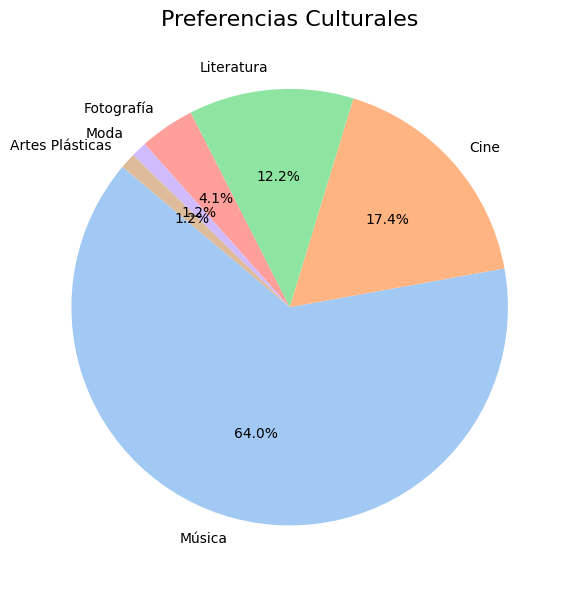

In [ ]:
# Visualización para "Vertiente cultural que más consumes"
def plot_cultural_preference(data, cultural_column='Vertiente cultural que más consumes'):
    plt.figure(figsize=(10, 6))
    cultural_counts = data[cultural_column].value_counts()
    colors = sns.color_palette("pastel", len(cultural_counts))
    plt.pie(cultural_counts, labels=cultural_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title("Preferencias Culturales", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_cultural_preference(df)

### Gráfico de Facultades

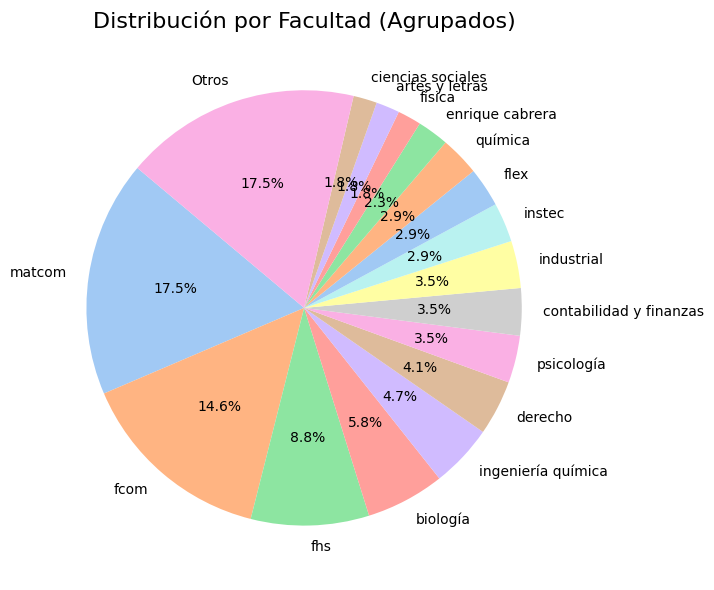

In [ ]:
# Función para agrupar valores pequeños en "Otros"
def group_small_categories(series, threshold=0.010):
    total = series.sum()
    series_perc = series / total  # Calcula proporciones
    grouped_series = series.copy()
    grouped_series[series_perc < threshold] = 0  # Valores menores al umbral se agrupan
    grouped_series['Otros'] = series[series_perc < threshold].sum()  # Agrupa en "Otros"
    return grouped_series[grouped_series > 0]  # Filtra los valores mayores a 0

# Visualización circular para "Facultad en que estudias"
def plot_faculty_distribution_pie(data, faculty_column='Facultad en que estudias', threshold=0.015):
    plt.figure(figsize=(10, 6))
    faculty_counts = data[faculty_column].value_counts()
    grouped_faculty_counts = group_small_categories(faculty_counts, threshold=threshold)
    colors = sns.color_palette("pastel", len(grouped_faculty_counts))
    plt.pie(
        grouped_faculty_counts, 
        labels=grouped_faculty_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors
    )
    plt.title("Distribución por Facultad (Agrupados)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_faculty_distribution_pie(df)

### Gráfico de Universidades

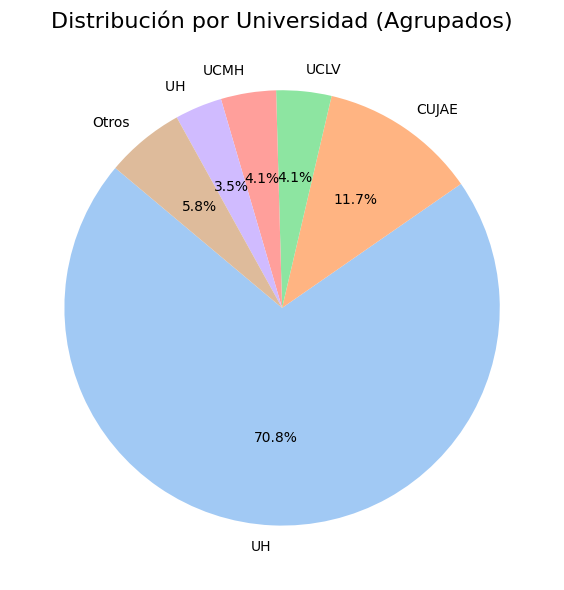

In [ ]:
# Gráfico circular para "Universidad en que estudias" con agrupación
def plot_university_distribution_pie(data, university_column='Universidad en que estudias', threshold=0.025):
    def group_small_categories(series, threshold=0.025):
        total = series.sum()
        series_perc = series / total
        grouped_series = series.copy()
        grouped_series[series_perc < threshold] = 0
        grouped_series['Otros'] = series[series_perc < threshold].sum()
        return grouped_series[grouped_series > 0]

    plt.figure(figsize=(10, 6))
    university_counts = data[university_column].value_counts()
    grouped_university_counts = group_small_categories(university_counts, threshold=threshold)
    colors = sns.color_palette("pastel", len(grouped_university_counts))
    plt.pie(
        grouped_university_counts, 
        labels=grouped_university_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors
    )
    plt.title("Distribución por Universidad (Agrupados)", fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_university_distribution_pie(df)

### Relaciones entre Facultad y Vertiente Cultural

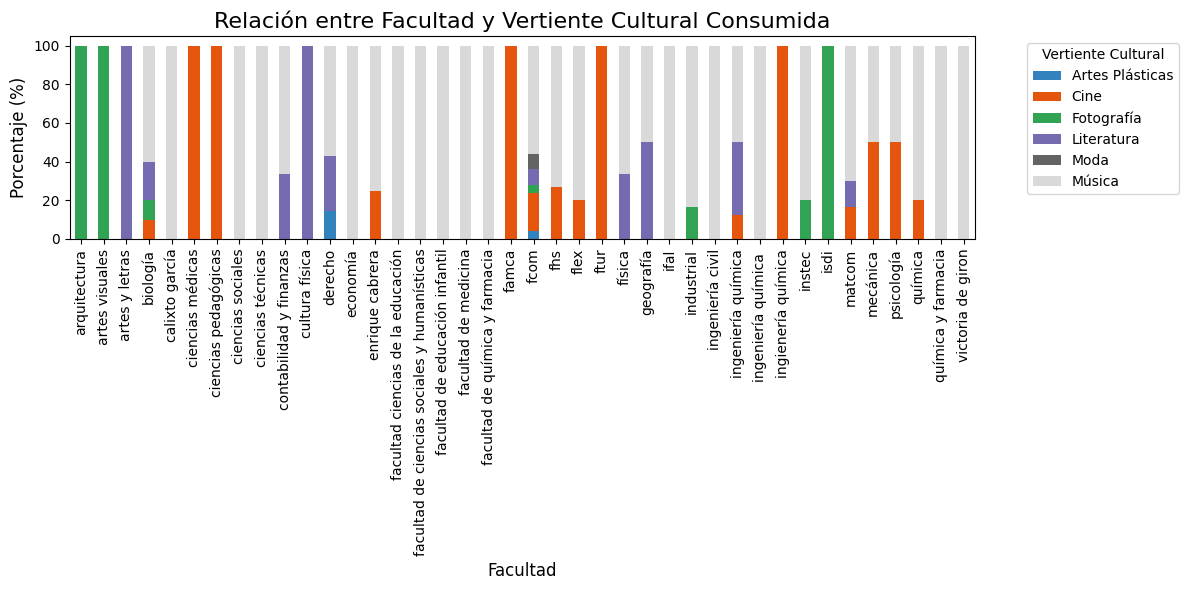

In [ ]:
def plot_stacked_bar_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column], normalize='index') * 100  # Normalizar por fila
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
    plt.title("Relación entre Facultad y Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Facultad", fontsize=12)
    plt.ylabel("Porcentaje (%)", fontsize=12)
    plt.legend(title="Vertiente Cultural", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
def plot_heatmap_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column])
    plt.figure(figsize=(12, 6))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title("Mapa de Calor: Facultad vs Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def plot_mosaic_faculty_culture(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Preparar datos para el mosaico
    mosaic_data = data.groupby([faculty_column, culture_column]).size()
    mosaic_data = mosaic_data / mosaic_data.sum()  # Normalizar
    mosaic_data = mosaic_data.unstack()  # Convertir a tabla
    plt.figure(figsize=(12, 6))
    mosaic(mosaic_data.stack(), title="Mosaico: Facultad vs Vertiente Cultural")
    plt.tight_layout()
    plt.show()
    
# Gráfico de barras apiladas
plot_stacked_bar_faculty_culture(df)


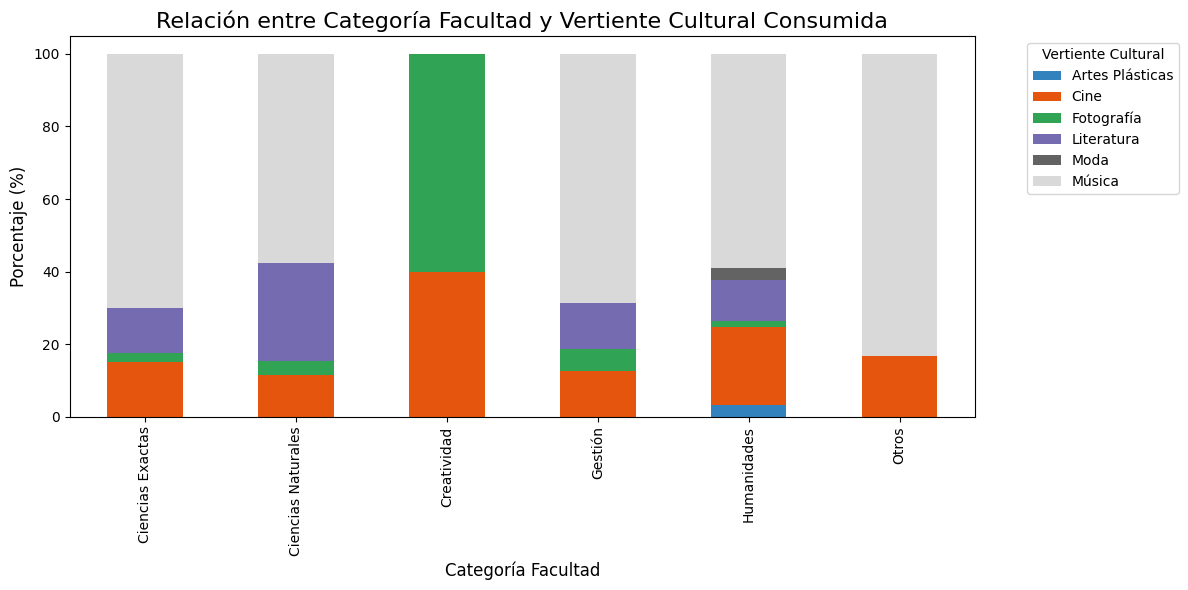

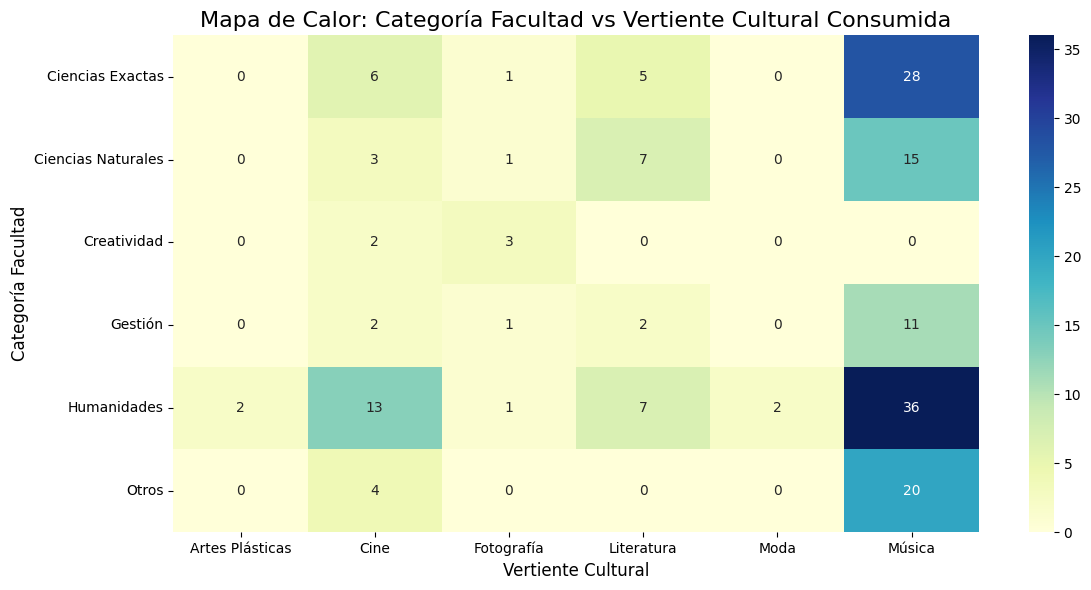

In [ ]:
def plot_stacked_bar_facultygroup_culture(data, faculty_column='Categoría Facultad', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column], normalize='index') * 100  # Normalizar por fila
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
    plt.title("Relación entre Categoría Facultad y Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Categoría Facultad", fontsize=12)
    plt.ylabel("Porcentaje (%)", fontsize=12)
    plt.legend(title="Vertiente Cultural", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
def plot_heatmap_facultygroup_culture(data, faculty_column='Categoría Facultad', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla cruzada
    crosstab = pd.crosstab(data[faculty_column], data[culture_column])
    plt.figure(figsize=(12, 6))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    plt.title("Mapa de Calor: Categoría Facultad vs Vertiente Cultural Consumida", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Categoría Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def plot_mosaic_facultygroup_culture(data, faculty_column='Categoría Facultad', culture_column='Vertiente cultural que más consumes'):
    # Preparar datos para el mosaico
    mosaic_data = data.groupby([faculty_column, culture_column]).size()
    mosaic_data = mosaic_data / mosaic_data.sum()  # Normalizar
    mosaic_data = mosaic_data.unstack()  # Convertir a tabla
    plt.figure(figsize=(12, 6))
    mosaic(mosaic_data.stack(), title="Mosaico: Categoría Facultad vs Vertiente Cultural")
    plt.tight_layout()
    plt.show()
    
# Gráfico de barras apiladas
plot_stacked_bar_facultygroup_culture(df)
plot_heatmap_facultygroup_culture(df)

Graficado con pruebas de Chi-cuadrado

Resultados de la Prueba de Chi-Cuadrado:
Chi-cuadrado: 208.2470
Grados de libertad: 195
Valor p: 0.2452
No se encontró una relación significativa entre la facultad y la vertiente cultural.


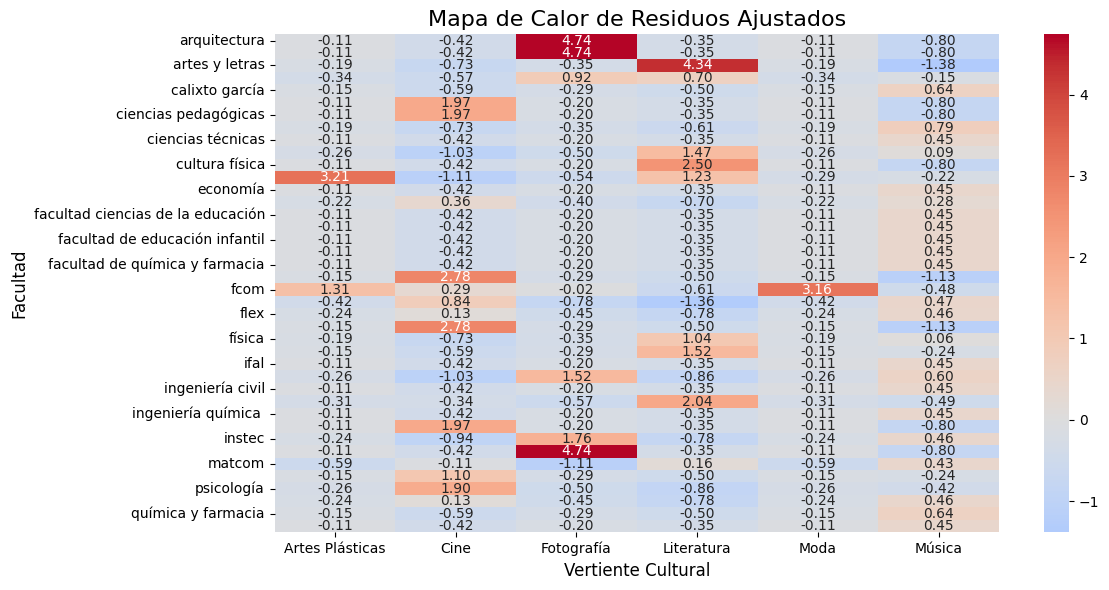

Resultados de la Prueba de Chi-Cuadrado:
Chi-cuadrado: 64.3431
Grados de libertad: 25
Valor p: 0.0000
Existe una relación significativa entre la facultad y la vertiente cultural.


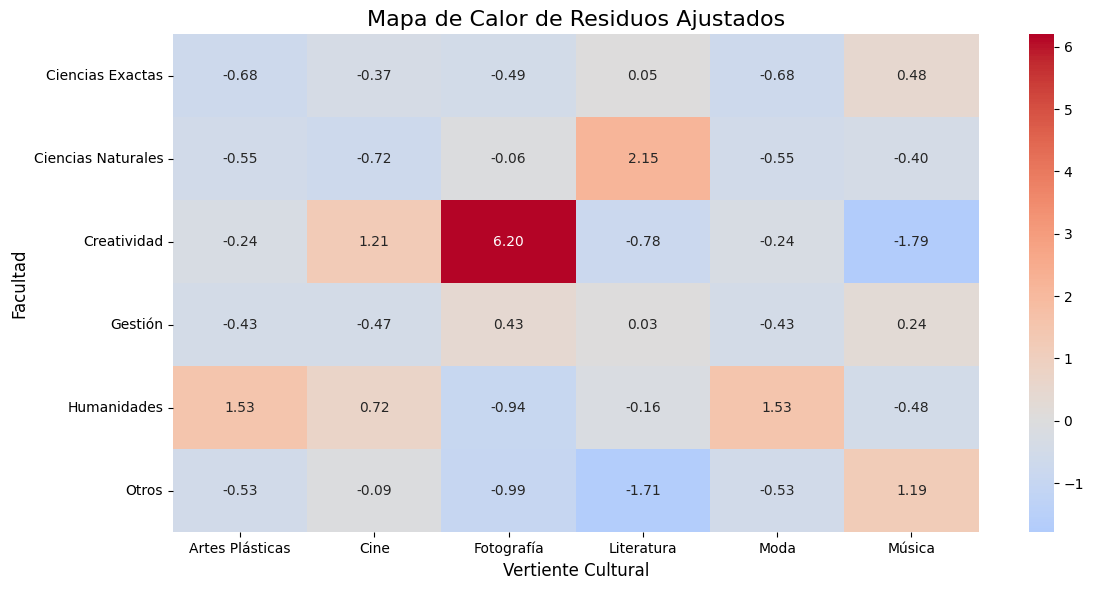

In [ ]:
def chi_square_test(data, faculty_column='Facultad en que estudias', culture_column='Vertiente cultural que más consumes'):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data[faculty_column], data[culture_column])
    
    # Prueba de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print("Resultados de la Prueba de Chi-Cuadrado:")
    print(f"Chi-cuadrado: {chi2:.4f}")
    print(f"Grados de libertad: {dof}")
    print(f"Valor p: {p:.4f}")
    
    # Verificar significancia
    if p < 0.05:
        print("Existe una relación significativa entre la categoría de la facultad y la vertiente cultural.")
    else:
        print("No se encontró una relación significativa entre la facultad y la vertiente cultural.")
    
    return contingency_table, expected

def plot_residuals_heatmap(contingency_table, expected):
    residuals = (contingency_table - expected) / np.sqrt(expected)  # Residuos ajustados
    plt.figure(figsize=(12, 6))
    sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0, cbar=True, fmt=".2f")
    plt.title("Mapa de Calor de Residuos Ajustados", fontsize=16)
    plt.xlabel("Vertiente Cultural", fontsize=12)
    plt.ylabel("Facultad", fontsize=12)
    plt.tight_layout()
    plt.show()
    
def post_hoc_analysis(contingency_table, expected, alpha=0.05):
    residuals = (contingency_table - expected) / np.sqrt(expected)
    p_values = 2 * (1 - norm.cdf(np.abs(residuals)))  # Valor p para cada celda
    significant = p_values < alpha  # Identificar celdas significativas
    
    # Mostrar combinaciones significativas
    significant_pairs = np.where(significant)
    # print("\nCombinaciones significativas:")
    # for i, j in zip(significant_pairs[0], significant_pairs[1]):
    #     print(f"Facultad: {contingency_table.index[i]}, Vertiente Cultural: {contingency_table.columns[j]} -> Residuo ajustado: {residuals.iloc[i, j]:.2f}, p-value: {p_values[i, j]:.4f}")
    
    return residuals, p_values

# Paso 1: Realizar la prueba de chi-cuadrado
contingency_table, expected = chi_square_test(df)

# Paso 2: Visualizar los residuos ajustados
plot_residuals_heatmap(contingency_table, expected)

contingency_table1, expected1 = chi_square_test(df,'Categoría Facultad')

plot_residuals_heatmap(contingency_table1, expected1)

# Paso 3: Análisis post hoc para identificar combinaciones significativas
residuals, p_values = post_hoc_analysis(contingency_table, expected)


Columna Artista plástico favorito no encontrada. Saltando Artes Plásticas.

Top 15 para Música:
BTS                  6
Billie Eilish        5
Metallica            4
Imagine Dragons      4
Ariana Grande        3
Kanye West           3
Molchat Doma         2
Silvio Rodríguez     2
Adele                2
Taylor Swift         2
Twenty One Pilots    2
Ed Sheeran           2
Ricardo Arjona       2
Rosalía              2
The Beatles          2
Name: count, dtype: int64

Top 15 para Cine:
Interestelar                            2
Coraline                                2
El Secreto de sus ojos                  1
Rosemarys Baby                          1
Across the universe                     1
El niño con el pijama de rayas          1
Captain Fantastic                       1
Inglorious Basterds                     1
Girl Interrupted                        1
Inferno                                 1
Avatar                                  1
What if                                 1
La trilogí

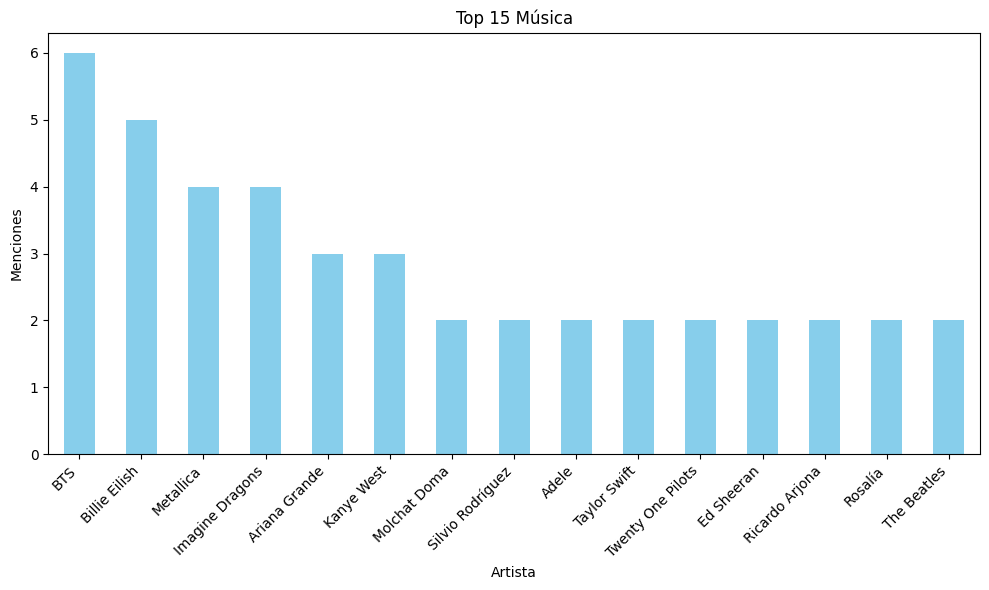

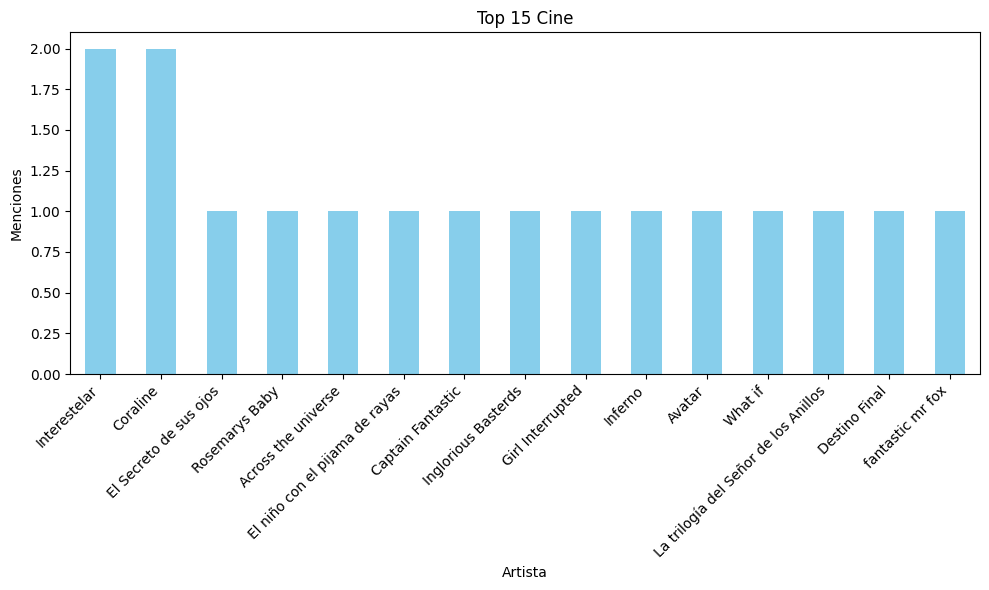

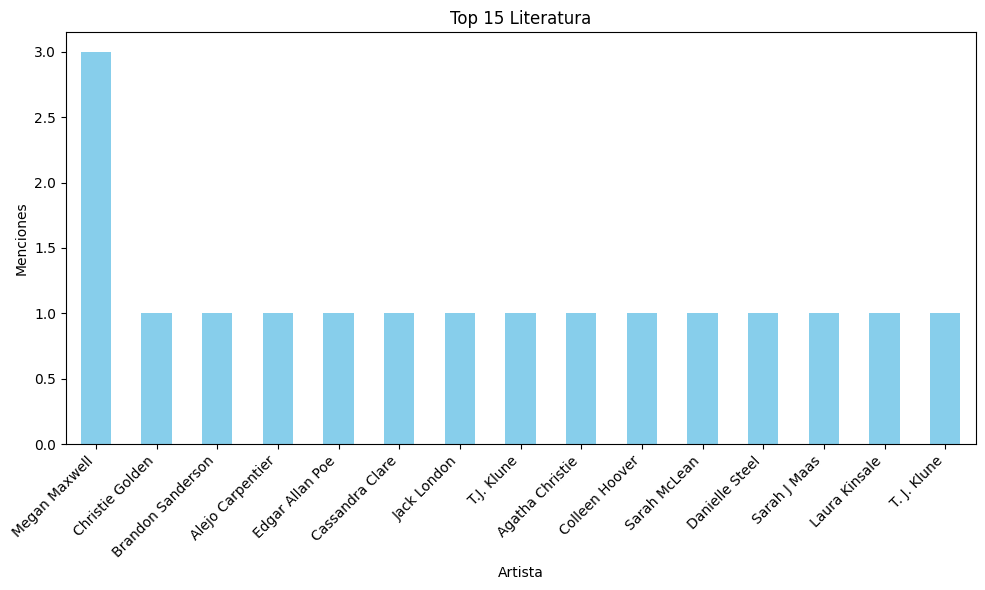

In [ ]:


def analyze_favorites(data, culture_column='Vertiente cultural que más consumes', mapping=None):
    """
    Analiza los artistas favoritos por cada vertiente cultural.
    
    Args:
        data (pd.DataFrame): DataFrame con las columnas de datos.
        culture_column (str): Nombre de la columna que contiene la vertiente cultural.
        mapping (dict): Diccionario que asocia vertientes culturales con columnas de artistas favoritos.
    
    Returns:
        dict: Diccionario con los 20 artistas más mencionados por cada vertiente cultural.
    """
    
    if mapping is None:
        mapping = {
            'Música': 'Cantante o grupo favorito',
            'Cine': 'Película favorita',
            'Literatura': 'Escritor favorito',
            'Artes Plásticas': 'Artista plástico favorito'
        }
    
    # Diccionario para almacenar resultados
    top_artists = {}

    # Iterar por cada vertiente cultural y su columna asociada
    for culture, artist_column in mapping.items():
        if artist_column not in data.columns:
            print(f"Columna {artist_column} no encontrada. Saltando {culture}.")
            continue

        # Filtrar filas de la vertiente cultural actual
        filtered_data = data[data[culture_column] == culture]

        # Crear una lista de todos los artistas mencionados
        artists_list = []
        for response in filtered_data[artist_column].dropna():
            # Dividir respuestas múltiples usando únicamente el delimitador ","
            artists = response.split(',')
            # Limpiar espacios y agregar a la lista
            artists_list.extend([artist.strip() for artist in artists])

        # Contar la frecuencia de cada artista
        artist_counts = pd.Series(artists_list).value_counts()

        # Seleccionar los 20 artistas más mencionados
        top_artists[culture] = artist_counts.head(15)

    return top_artists


mapping = {
    'Música': 'Cantante o grupo favorito',
    'Cine': 'Película favorita',
    'Literatura': 'Escritor favorito',
    'Artes Plásticas': 'Artista plástico favorito'
}

# Análisis
resultados = analyze_favorites(df, culture_column='Vertiente cultural que más consumes', mapping=mapping)

# Mostrar resultados
for culture, artists in resultados.items():
    print(f"\nTop 15 para {culture}:")
    print(artists)

for culture, artists in resultados.items():
    plt.figure(figsize=(10, 6))
    artists.plot(kind='bar', color='skyblue')
    plt.title(f"Top 15 {culture}")
    plt.xlabel("Artista")
    plt.ylabel("Menciones")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Columna Artista plástico favorito no encontrada. Saltando...

Top 15 para Cantante o grupo favorito:
BTS                  8
Imagine Dragons      6
Billie Eilish        6
Ariana Grande        5
Melendi              4
Taylor Swift         4
Metallica            4
Morat                3
Måneskin             3
Ricardo Arjona       3
Kanye West           3
Adele                2
Twenty One Pilots    2
Coldplay             2
Mitski               2
Name: count, dtype: int64

Top 15 para Película favorita:
Interestelar                  6
Forrest Gump                  4
Inception                     3
Piratas del Caribe            3
Fight Club                    3
Harry Potter                  3
Mamma Mia                     3
Avatar                        3
Titanic                       2
Harry potter                  2
Coraline                      2
Tres Metros sobre el cielo    2
The Hunger Games              2
Lucy                          2
Destino Final                 1
Name: count, dty

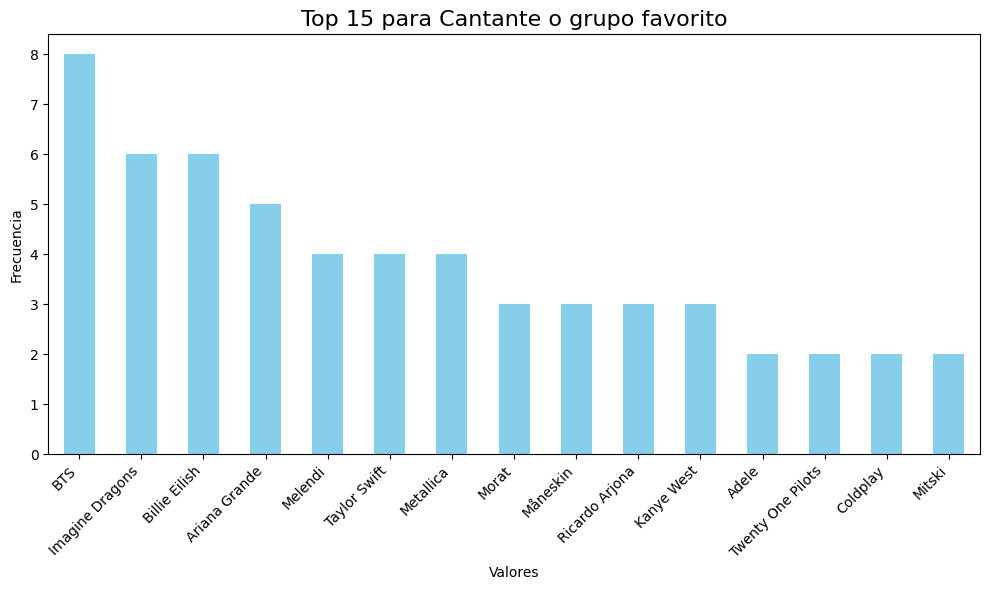

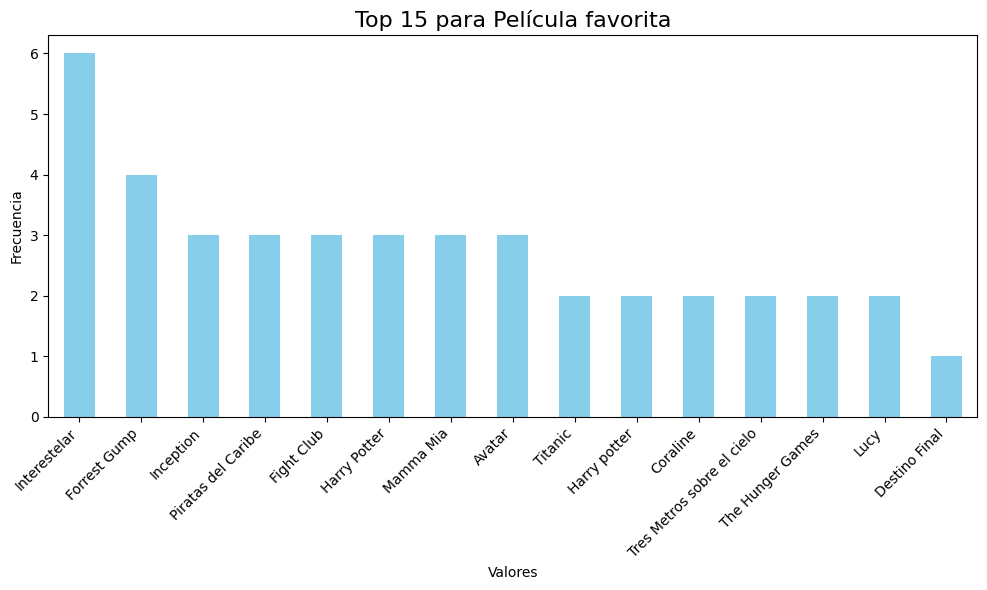

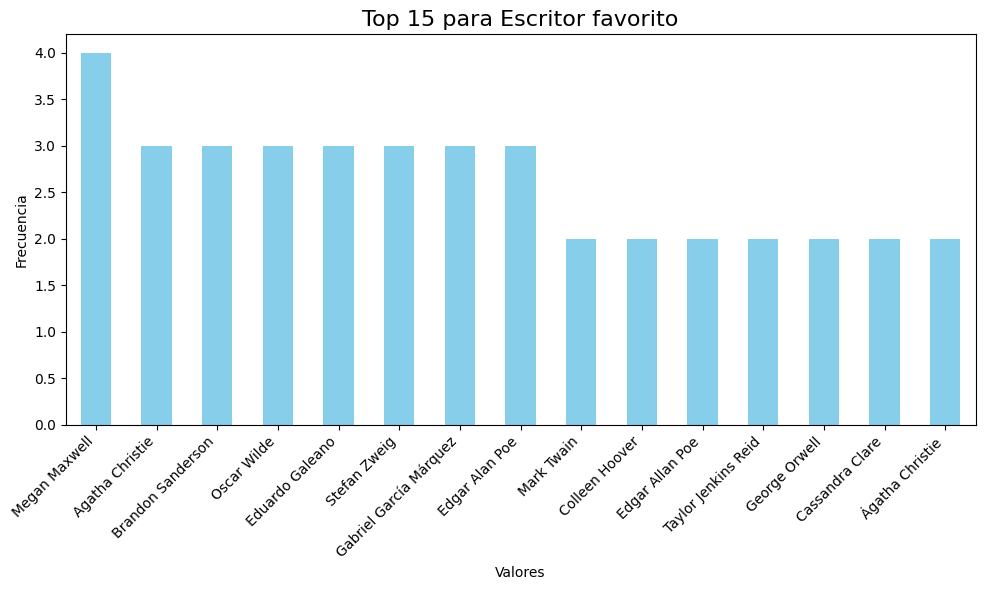

In [ ]:
def analyze_top_values(data, columns):
    """
    Analiza los valores más repetidos para cada columna en una lista dada, considerando respuestas múltiples separadas por ",".
    
    Args:
        data (pd.DataFrame): DataFrame con las columnas a analizar.
        columns (list): Lista de nombres de columnas a analizar.
    
    Returns:
        dict: Diccionario con los 20 valores más repetidos para cada columna.
    """
    # Diccionario para almacenar los resultados
    top_values = {}

    for column in columns:
        if column not in data.columns:
            print(f"Columna {column} no encontrada. Saltando...")
            continue

        # Crear una lista para almacenar los valores
        value_list = []

        for response in data[column].dropna():
            # Dividir respuestas múltiples usando únicamente el delimitador ","
            values = response.split(',')
            # Limpiar espacios y agregar a la lista
            value_list.extend([value.strip() for value in values])

        # Contar los valores y obtener los 20 más repetidos
        value_counts = pd.Series(value_list).value_counts()
        top_values[column] = value_counts.head(15)

    return top_values



columns_to_analyze = [
    'Cantante o grupo favorito',
    'Película favorita',
    'Escritor favorito',
    'Artista plástico favorito'
]

# Análisis
resultados_sin_asociacion = analyze_top_values(df, columns_to_analyze)

# Mostrar resultados
for column, values in resultados_sin_asociacion.items():
    print(f"\nTop 15 para {column}:")
    print(values)
    
for column, values in resultados_sin_asociacion.items():
    plt.figure(figsize=(10, 6))
    values.plot(kind='bar', color='skyblue')
    plt.title(f"Top 15 para {column}", fontsize=16)
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analizar_por_vertiente_cultural(df, columna_vertiente, columna_objetivo, subcategorias, titulo_grafico):
    """
    Análisis de un top 15 por vertiente cultural con gráfica de porcentajes.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columna_vertiente (str): Nombre de la columna con la vertiente cultural.
        columna_objetivo (str): Nombre de la columna objetivo (cantante, película, escritor).
        subcategorias (dict): Diccionario con las subcategorías.
        titulo_grafico (str): Título del gráfico.

    Returns:
        pd.DataFrame: DataFrame con los resultados del top 15.
    """
    # Normalizar columnas
    df[columna_vertiente] = df[columna_vertiente].str.strip().str.lower()
    df[columna_objetivo] = df[columna_objetivo].str.strip().str.lower()

    # Calcular el top 15 por vertiente cultural
    top_15 = (
        df.groupby(columna_vertiente)[columna_objetivo]
        .apply(lambda x: x.value_counts().head(15))
        .reset_index(name='Frecuencia')
    )

    # Clasificar en categorías
    def clasificar_respuesta(valor):
        if valor in subcategorias['primera_subcategoria']:
            return 'Hispanohablantes'
        elif valor in subcategorias['segunda_subcategoria']:
            return 'Cubanos'
        else:
            return 'Otros'

    df['Categoría'] = df[columna_objetivo].apply(clasificar_respuesta)

    # Calcular proporciones por vertiente cultural
    proporciones = (
        df.groupby([columna_vertiente, 'Categoría'])
        .size()
        .unstack(fill_value=0)
        .apply(lambda x: x / x.sum() * 100, axis=1)  # Convertir a %
    )

    # Gráfico de porcentajes
    proporciones.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.8)
    plt.title(f'Porcentaje de Categorías por {titulo_grafico}')
    plt.ylabel('Porcentaje')
    plt.xlabel('Vertiente Cultural')
    plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return top_15


In [ ]:
subcategorias_cantante = {
    'primera_subcategoria': [
        'mago de oz', 'ricardo arjona', 'elevación', 'rocio jurado', 'alex ubago',
        'melendi', 'natos y waor', 'rosalía', 'morat', 'romeo santos', 'c.tangana',
        'fito y fitipaldis'
    ],
    'segunda_subcategoria': [
        'buena fé', 'silvio rodríguez', 'pablo milanés', 'alexander abreu'
    ]
}

subcategorias_pelicula = {
    'primera_subcategoria': [
        'perdiendo el norte', '3 metros sobre el cielo', 'el secreto de sus ojos'
    ],
    'segunda_subcategoria': [
        'la muerte de un burócrata', 'habana blues'
    ]
}

subcategorias_escritor = {
    'primera_subcategoria': [
        'eduardo galeano', 'gabriel garcía márquez', 'carlos ruiz zafón', 'risto mejide',
        'eva muñoz', 'julio cortázar', 'paulo cohelo', 'irene solá', 'pablo neruda',
        'julio césar', 'isabel allende', 'agustina bazterrica'
    ],
    'segunda_subcategoria': [
        'julio travieso serrano', 'leonardo padura', 'alejo carpentier'
    ]
}


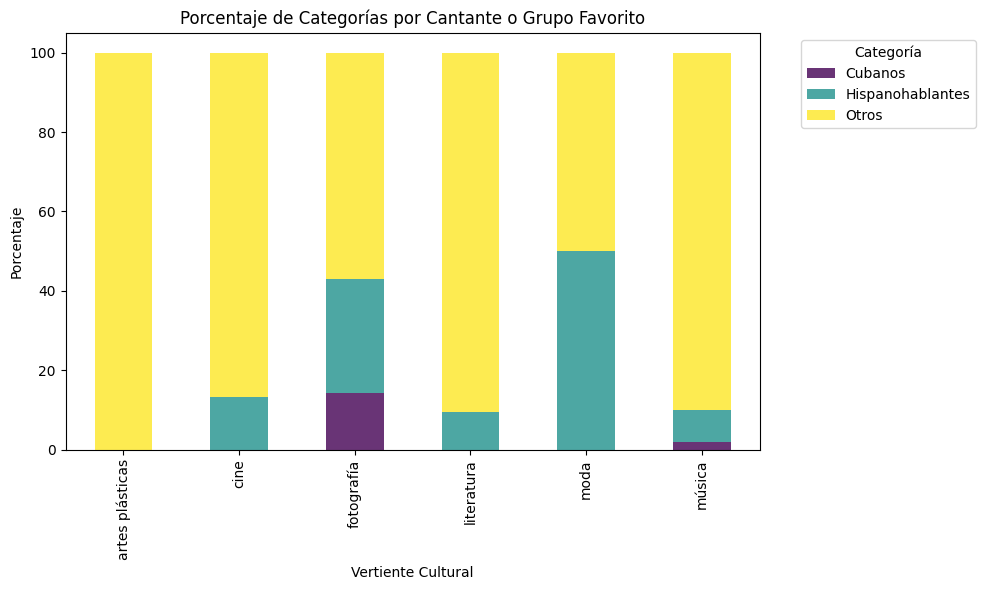

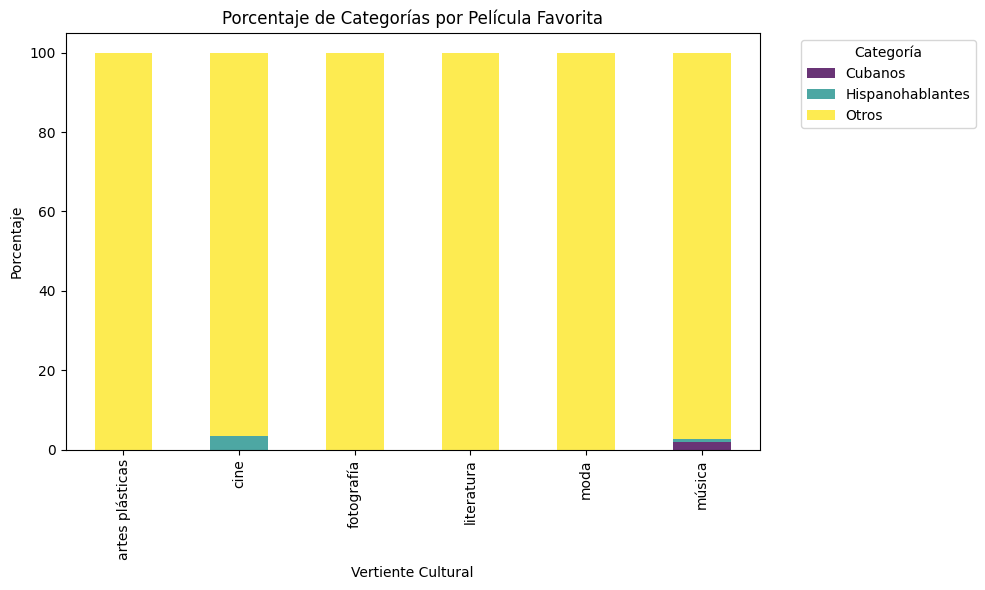

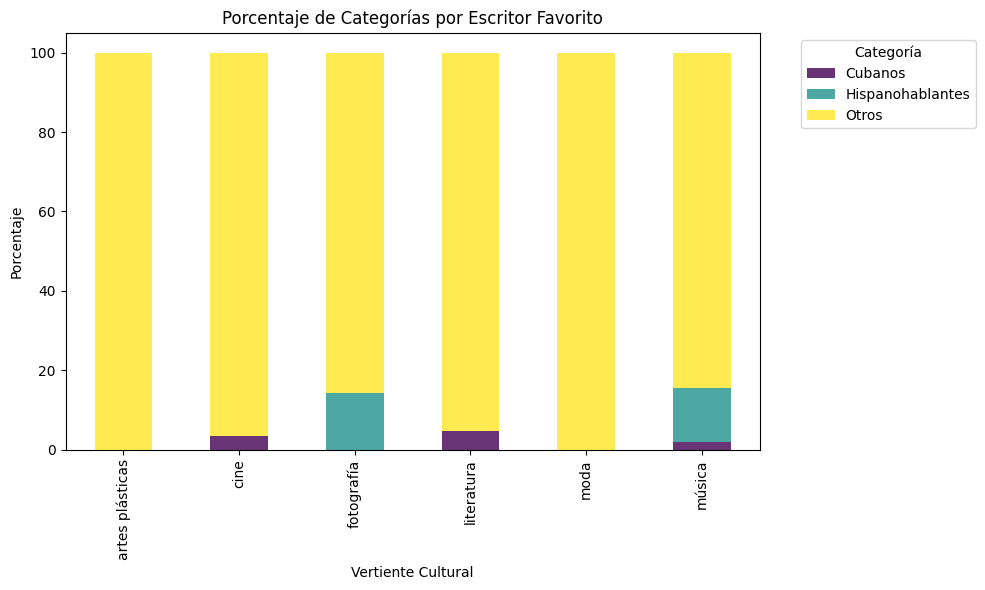

In [ ]:
top_cantantes = analizar_por_vertiente_cultural(
    df,
    columna_vertiente='Vertiente cultural que más consumes',
    columna_objetivo='Cantante o grupo favorito',
    subcategorias=subcategorias_cantante,
    titulo_grafico='Cantante o Grupo Favorito'
)

top_peliculas = analizar_por_vertiente_cultural(
    df,
    columna_vertiente='Vertiente cultural que más consumes',
    columna_objetivo='Película favorita',
    subcategorias=subcategorias_pelicula,
    titulo_grafico='Película Favorita'
)

top_escritores = analizar_por_vertiente_cultural(
    df,
    columna_vertiente='Vertiente cultural que más consumes',
    columna_objetivo='Escritor favorito',
    subcategorias=subcategorias_escritor,
    titulo_grafico='Escritor Favorito'
)


## 8. Estimadores

- ### Estimación Puntual (Máxima Verosimilitud)

In [ ]:
for col in numeric_cols:
    media_mle = df[col].mean()
    desv_std_mle = df[col].std()
    print(f"Columna: {col}")
    print(f"Media (MLE): {media_mle}")
    print(f"Desviación estándar (MLE): {desv_std_mle}")

Columna: Qué edad tienes?
Media (MLE): 20.1046511627907
Desviación estándar (MLE): 1.5065476569007896


- ### Intervalos de Confianza

In [ ]:
from scipy.stats import norm

alpha = 0.05  # Nivel de confianza
for col in numeric_cols:
    media = df[col].mean()
    std_err = df[col].std() / (len(df[col]) ** 0.5)  # Error estándar
    ci = norm.interval(1 - alpha, loc=media, scale=std_err)
    print(f"Columna: {col}")
    print(f"Intervalo de confianza al 95%: {ci}")
    
# Crear una columna binaria: menciona 'Rock' o no
rock_present = df['Géneros musicales favoritos'].dropna().apply(lambda x: 1 if 'Rock' in x else 0)

# Calcular proporción y su intervalo de confianza
p_hat = rock_present.mean()  # proporción
n = len(rock_present)
se = np.sqrt((p_hat * (1 - p_hat)) / n)  # error estándar
z = 1.96  # z para 95% de confianza

ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print("\nIntervalo de Confianza para proporción de 'Rock':")
print(f"Proporción: {p_hat:.4f}, Intervalo: [{ci_lower:.4f}, {ci_upper:.4f}]")

Columna: Qué edad tienes?
Intervalo de confianza al 95%: (19.87950386346218, 20.329798462119218)

Intervalo de Confianza para proporción de 'Rock':
Proporción: 0.0000, Intervalo: [0.0000, 0.0000]


## 9. Pruebas de hipótesis

- ### Hipótesis 1: Comprobar si la media de una variable difiere significativamente de un valor hipotético

In [ ]:
# Definir hipótesis
media_hipotesis = 21
media_muestral = df['Qué edad tienes?'].mean()
desviacion_muestral = df['Qué edad tienes?'].std()
n = len(df['Qué edad tienes?'])

# Estadístico de prueba
t_stat = (media_muestral - media_hipotesis) / (desviacion_muestral / np.sqrt(n))
p_value = stats.t.sf(np.abs(t_stat), df=n-1) * 2  # Prueba bilateral

# Resultado
print(f"Estadístico t: {t_stat:.3f}")
print(f"p-valor: {p_value:.3f}")

# Interpretación
if p_value <= 0.05:
    print("Rechazamos la hipótesis nula: La media de la edad es significativamente diferente de 21 años.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la media es diferente de 21 años.")


Estadístico t: -7.794
p-valor: 0.000
Rechazamos la hipótesis nula: La media de la edad es significativamente diferente de 21 años.


- ### Hipótesis 2: Comparar las medias de dos grupos

In [ ]:
# Dividir los datos en dos grupos
grupo1 = df[df['Categoría Facultad'] == 'Ciencias Exactas']['Qué edad tienes?']
grupo2 = df[df['Categoría Facultad'] == 'Humanidades']['Qué edad tienes?']

# Prueba t para dos muestras independientes
t_stat, p_value = stats.ttest_ind(grupo1, grupo2, equal_var=False)

# Resultados
print(f"Estadístico t: {t_stat:.3f}")
print(f"p-valor: {p_value:.3f}")

# Interpretación
if p_value <= 0.05:
    print("Rechazamos la hipótesis nula: Las edades medias entre los dos grupos son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que las edades medias son diferentes.")


Estadístico t: -1.566
p-valor: 0.120
No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que las edades medias son diferentes.


- ### Hipótesis 3: Comprobar si la distribución de una variable es normal

In [ ]:
columna = numeric_cols[0]
stat, p_value = stats.shapiro(df[columna].dropna())
print(f"\nHipótesis 3: ¿La variable \"{columna}\" sigue una distribución normal?")
print(f"Estadístico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula (no es normal).")
else:
    print("No podemos rechazar la hipótesis nula (es normal).")


Hipótesis 3: ¿La variable "Qué edad tienes?" sigue una distribución normal?
Estadístico de prueba: 0.9107014401536149
p-valor: 9.909095839965357e-09
Rechazamos la hipótesis nula (no es normal).


### Hipótesis 4: Proporción de Spotify > 50%

In [ ]:
spotify_present = df['Plataforma donde más consumes música'].dropna().apply(lambda x: 1 if 'Spotify' in x else 0)
spotify_proporcion = spotify_present.mean()

# Realizar prueba z
z_score = (spotify_proporcion - 0.5) / np.sqrt((0.5 * 0.5) / len(spotify_present))
p_value = 1 - stats.norm.cdf(z_score)

print("\nPrueba de Hipótesis: Proporción de Spotify > 50%")
print(f"Z-Score: {z_score:.4f}, P-Valor: {p_value:.4f}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. La proporcion de usuarios de Spotify es significativamente mayor al 50%.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.")


Prueba de Hipótesis: Proporción de Spotify > 50%
Z-Score: -10.1708, P-Valor: 1.0000
No podemos rechazar la hipótesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.


### Hipótesis 5: Spotify vs. Telegram

In [ ]:
telegram_present = df['Plataforma donde más consumes música'].dropna().apply(lambda x: 1 if 'Telegram' in x else 0)

# Proporciones y tamaños
p1, p2 = spotify_present.mean(), telegram_present.mean()
n1, n2 = len(spotify_present), len(telegram_present)

# Estadístico z para diferencia de proporciones
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
se_combined = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
z_diff = (p1 - p2) / se_combined
p_diff = 2 * (1 - stats.norm.cdf(abs(z_diff)))

print("\nPrueba de Hipótesis: Spotify vs Telegram")
print(f"Z-Score: {z_diff:.4f}, P-Valor: {p_diff:.4f}")
if p_diff < 0.05:
    print("Conclusión: Recazamos la hipótesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.")
else:
    print("Conclusión: No se rechaza la hipótesis nula. No hay evidencia suficiente de una evidencia significativa entre las proporciones de usuarios de Sotify y Telegram.")



Prueba de Hipótesis: Spotify vs Telegram
Z-Score: -7.5646, P-Valor: 0.0000
Conclusión: Recazamos la hipótesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.


## 9.1 Tablas de Contingencia y Tests

### Test de Independencia

In [ ]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Géneros musicales favoritos'], df['Plataforma donde más consumes música'])

# Prueba de Chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Resultados
print(f"Chi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.3f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretación
if p_value <= 0.05:
    print("Rechazamos la hipótesis nula: Existe una relación significativa entre los géneros musicales y la plataforma de consumo.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que están relacionados.")


Chi-cuadrado: 871.951
p-valor: 0.825
Grados de libertad: 912
Frecuencias esperadas:
[[0.03592814 0.17964072 0.01197605 ... 0.97005988 0.0239521  0.49101796]
 [0.03592814 0.17964072 0.01197605 ... 0.97005988 0.0239521  0.49101796]
 [0.01796407 0.08982036 0.00598802 ... 0.48502994 0.01197605 0.24550898]
 ...
 [0.01796407 0.08982036 0.00598802 ... 0.48502994 0.01197605 0.24550898]
 [0.03592814 0.17964072 0.01197605 ... 0.97005988 0.0239521  0.49101796]
 [0.01796407 0.08982036 0.00598802 ... 0.48502994 0.01197605 0.24550898]]
No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que están relacionados.


### Test de Homogeneidad

In [ ]:
# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Categoría Facultad'], df['Géneros musicales favoritos'])

# Prueba de Chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Resultados
print(f"Chi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.3f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretación
if p_value <= 0.05:
    print("Rechazamos la hipótesis nula: Las distribuciones de géneros musicales no son iguales entre las categorías de facultades.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que las distribuciones son diferentes.")


Chi-cuadrado: 585.037
p-valor: 0.377
Grados de libertad: 575
Frecuencias esperadas:
[[0.45238095 0.45238095 0.22619048 0.22619048 0.9047619  0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.45238095 0.22619048 3.8452381  0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.45238095 0.22619048 0.22619048 0.67857143 0.22619048 0.45238095
  0.22619048 0.22619048 1.13095238 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.67857143 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  1.80952381 0.22619048 0.22619048 0.45238095 0.22619048 0.45238095
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.22619048 0.22619048 0.22619048 0.22619048
  0.22619048 0.22619048 0.226190

In [ ]:
# Suma de frecuencias observadas
observed = df['Géneros musicales favoritos'].value_counts()
total_observed = observed.sum()

# Calcular frecuencias esperadas y normalizarlas
expected = [total_observed / len(observed)] * len(observed)  # Distribución uniforme
expected = np.array(expected)  # Asegurar que sea un arreglo NumPy

# Ajustar por si hay pequeñas diferencias de redondeo
expected = expected * (total_observed / expected.sum())

# Validar que las sumas coincidan
print(f"Suma observada: {observed.sum()}")
print(f"Suma esperada: {sum(expected)}")

# Prueba de Chi-cuadrado
chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Resultados
print(f"Chi-cuadrado: {chi2:.3f}")
print(f"p-valor: {p_value:.3f}")

# Interpretación
if p_value <= 0.05:
    print("Rechazamos la hipótesis nula: La distribución observada no es uniforme.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la distribución es diferente de uniforme.")


Suma observada: 168
Suma esperada: 167.99999999999983
Chi-cuadrado: 251.810
p-valor: 0.000
Rechazamos la hipótesis nula: La distribución observada no es uniforme.


In [ ]:
# Verificar si hay valores faltantes
print(df[['Qué edad tienes?', 'Vertiente cultural que más consumes', 'Géneros musicales favoritos']].isnull().sum())

# Limpiar datos: eliminar espacios adicionales y convertir a minúsculas
df['Vertiente cultural que más consumes'] = df['Vertiente cultural que más consumes'].str.strip().str.lower()
df['Géneros musicales favoritos'] = df['Géneros musicales favoritos'].str.strip().str.lower()

# Seleccionar variables relevantes y eliminar filas con valores faltantes
variables_categoricas = ['Vertiente cultural que más consumes', 'Géneros musicales favoritos']
df_model = df[['Qué edad tienes?'] + variables_categoricas].dropna()

# # Revisar y reducir categorías en variables categóricas
# threshold = 8
# for col in variables_categoricas:
#     frecuencias = df[col].value_counts()
#     categorias_a_mantener = frecuencias[frecuencias >= threshold].index
#     df[col] = df[col].apply(lambda x: x if x in categorias_a_mantener else 'Otros')


# Codificar variables categóricas con one-hot encoding
df_model = pd.get_dummies(df_model, columns=variables_categoricas, drop_first=True)

# Convertir todas las columnas a float
df_model = df_model.astype(float)

# Definir variables dependiente e independientes
X = df_model.drop('Qué edad tienes?', axis=1)
y = df_model['Qué edad tienes?']

# Agregar constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

print("Número de residuos:", len(modelo.resid))

# Resumen del modelo
print(modelo.summary())




Qué edad tienes?                       0
Vertiente cultural que más consumes    0
Géneros musicales favoritos            4
dtype: int64
Número de residuos: 168
                            OLS Regression Results                            
Dep. Variable:       Qué edad tienes?   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.001
Date:                Fri, 24 Jan 2025   Prob (F-statistic):              0.512
Time:                        21:31:57   Log-Likelihood:                -202.86
No. Observations:                 168   AIC:                             645.7
Df Residuals:                      48   BIC:                             1021.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                                                  

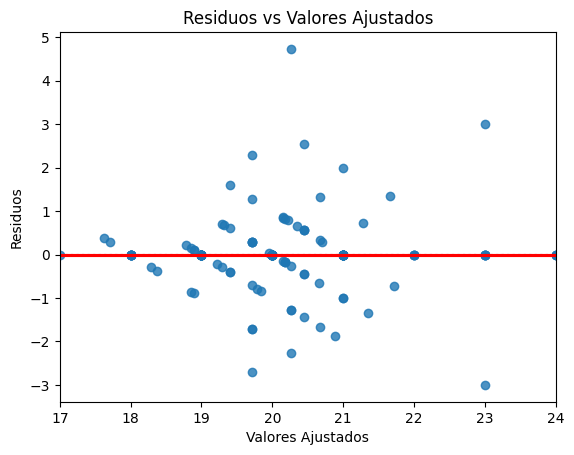

Estadístico de Shapiro-Wilk: 0.714, p-valor: 0.000
Estadístico LM: 67.050, p-valor: 1.000


/home/lia/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/lia/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                              Variable       VIF
0                                                const  0.000000
1             Vertiente cultural que más consumes_cine       inf
2       Vertiente cultural que más consumes_fotografía       inf
3       Vertiente cultural que más consumes_literatura       inf
4             Vertiente cultural que más consumes_moda       inf
..                                                 ...       ...
116  Géneros musicales favoritos_rock, reggaetón, r...  1.556045
117  Géneros musicales favoritos_rock, reggaetón, t...  1.583603
118  Géneros musicales favoritos_rock, reggaetón, t...  1.556045
119                   Géneros musicales favoritos_trap  2.050073
120                  Géneros musicales favoritos_trova  2.298282

[121 rows x 2 columns]


In [ ]:
# Residuos vs Valores Ajustados
sns.residplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

# # Seleccionar una muestra de los residuos para graficar
# residuos_muestra = modelo.resid.sample(50, random_state=42)

# # Graficar la muestra
# sns.histplot(residuos_muestra, kde=True)
# plt.title('Distribución de Residuos (Muestra)')
# plt.xlabel('Residuos')
# plt.ylabel('Frecuencia')
# plt.show()

# Prueba de Shapiro-Wilk
stat, p_value = shapiro(modelo.resid)
print(f"Estadístico de Shapiro-Wilk: {stat:.3f}, p-valor: {p_value:.3f}")

# Prueba de Breusch-Pagan
lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(modelo.resid, X)
print(f"Estadístico LM: {lm_stat:.3f}, p-valor: {lm_p_value:.3f}")

# Calcular VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


In [ ]:
# Resumen del modelo
print("=== Resumen del Modelo ===")
print(f"R-cuadrado: {modelo.rsquared:.3f}")
print(f"R-cuadrado ajustado: {modelo.rsquared_adj:.3f}")
print(f"Error estándar residual: {np.sqrt(modelo.mse_resid):.3f}")
print("\n=== Coeficientes Significativos ===")

# Filtrar coeficientes significativos
resultados_coeficientes = modelo.summary2().tables[1]  # Tabla de coeficientes
significativos = resultados_coeficientes[resultados_coeficientes['P>|t|'] <= 0.05]

if not significativos.empty:
    print(significativos[['Coef.', 'P>|t|', '[0.025', '0.975]']])
    print("\nInterpretación:")
    for idx, row in significativos.iterrows():
        signo = "aumenta" if row['Coef.'] > 0 else "reduce"
        print(f"- {idx}: {signo} la edad promedio en {abs(row['Coef.']):.2f} años (p = {row['P>|t|']:.3f}).")
else:
    print("No se encontraron coeficientes significativos.")

# Evaluación de los supuestos
print("\n=== Evaluación de los Supuestos ===")

# Normalidad de residuos
if p_value > 0.05:
    print("Los residuos siguen una distribución normal (p > 0.05).")
else:
    print("Los residuos NO siguen una distribución normal (p <= 0.05).")

# Homoscedasticidad
if lm_p_value > 0.05:
    print("Los residuos tienen varianza constante (homoscedasticidad, p > 0.05).")
else:
    print("Los residuos NO tienen varianza constante (heteroscedasticidad, p <= 0.05).")

# Multicolinealidad
print("\n=== Multicolinealidad ===")
vif_problematicas = vif_data[vif_data['VIF'] > 5]
if not vif_problematicas.empty:
    print(f"Variables con multicolinealidad problemática (VIF > 5):")
    print(vif_problematicas)
else:
    print("No se detectó multicolinealidad problemática (VIF <= 5).")

# Resumen final
print("\n=== Resumen Final ===")
if modelo.rsquared_adj >= 0.3:
    print("El modelo explica una proporción significativa de la variabilidad en la edad.")
else:
    print("El modelo tiene un bajo poder explicativo (R^2 ajustado < 0.3).")

if not significativos.empty and p_value > 0.05 and lm_p_value > 0.05:
    print("El modelo es válido y tiene al menos una variable significativa.")
else:
    print("Revisar supuestos y/o considerar más variables.")


=== Resumen del Modelo ===
R-cuadrado: 0.713
R-cuadrado ajustado: 0.001
Error estándar residual: 1.514

=== Coeficientes Significativos ===
                                                        Coef.         P>|t|  \
const                                               15.459899  5.871276e-23   
Vertiente cultural que más consumes_cine             2.912471  3.919385e-05   
Vertiente cultural que más consumes_literatura       2.167730  1.005283e-03   
Vertiente cultural que más consumes_música           2.480196  7.308475e-05   
Géneros musicales favoritos_hip-hop                  3.716137  1.986016e-02   
Géneros musicales favoritos_hip-hop, pop, trova      4.627630  1.831410e-02   
Géneros musicales favoritos_jazz, trova, blues,...   5.059904  1.094027e-02   
Géneros musicales favoritos_pop, folk, indie, a...   5.627630  4.633839e-03   
Géneros musicales favoritos_pop, jazz, blues         5.540101  7.679811e-04   
Géneros musicales favoritos_pop, trap, kpop          6.059904  2.64965

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selección de todas las columnas excepto identificadores irrelevantes
variables_relevantes = ['Qué edad tienes?', 'Vertiente cultural que más consumes', 'Géneros musicales favoritos', 'Cantante o grupo favorito', 'Plataforma donde más consumes música', 'Géneros cinematográficos favoritos', 'Plataforma donde mas consumes cine', 'Película favorita', 'Gèneros literarios favoritos', 'Plataforma donde más consumes literatura', 'Escritor favorito', 'Arte plástica favorita', 'Plataforma donde más consumes artes plásticas']


df_pca = df[variables_relevantes]

# Codificar variables categóricas usando one-hot encoding
df_pca = pd.get_dummies(df_pca, drop_first=True)

# Convertir todas las columnas a float
df_pca = df_pca.astype(float)

# Manejar valores faltantes (rellenar con 0 en este caso)
df_pca = df_pca.fillna(0)

# Normalización de todas las columnas
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Aplicar PCA
pca = PCA()  # Por defecto, calcula tantos componentes como columnas
pca_result = pca.fit_transform(df_pca_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", varianza_explicada)
print("Varianza explicada acumulada:", varianza_explicada.cumsum())



Varianza explicada por cada componente: [1.18937825e-02 1.10313676e-02 1.07161795e-02 1.05532023e-02
 1.03905176e-02 1.02465725e-02 1.02105114e-02 1.01406986e-02
 1.00749607e-02 9.88807004e-03 9.75931718e-03 9.66084985e-03
 9.56900510e-03 9.42278981e-03 9.39957984e-03 9.38538853e-03
 9.07457417e-03 8.96134813e-03 8.90176758e-03 8.84969667e-03
 8.77026070e-03 8.72058891e-03 8.66879513e-03 8.64678118e-03
 8.59601920e-03 8.56023560e-03 8.46689020e-03 8.43105926e-03
 8.37416123e-03 8.31468690e-03 8.28762345e-03 8.21895640e-03
 8.14375243e-03 8.05073903e-03 8.03046996e-03 7.97744981e-03
 7.96382117e-03 7.94181647e-03 7.81268490e-03 7.77741231e-03
 7.76366773e-03 7.68255486e-03 7.64400916e-03 7.60940607e-03
 7.57981015e-03 7.50886363e-03 7.47785540e-03 7.43565649e-03
 7.35517032e-03 7.30940179e-03 7.26231050e-03 7.22481857e-03
 7.17550898e-03 7.13170876e-03 7.04266831e-03 7.01927447e-03
 6.95321862e-03 6.93034749e-03 6.89024973e-03 6.82690379e-03
 6.75653577e-03 6.72458272e-03 6.70392285e-03

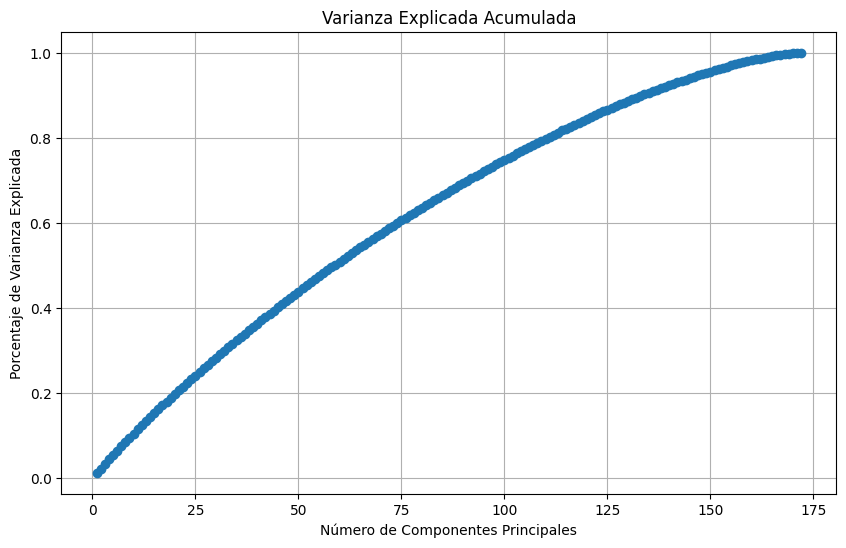

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.grid()
plt.show()


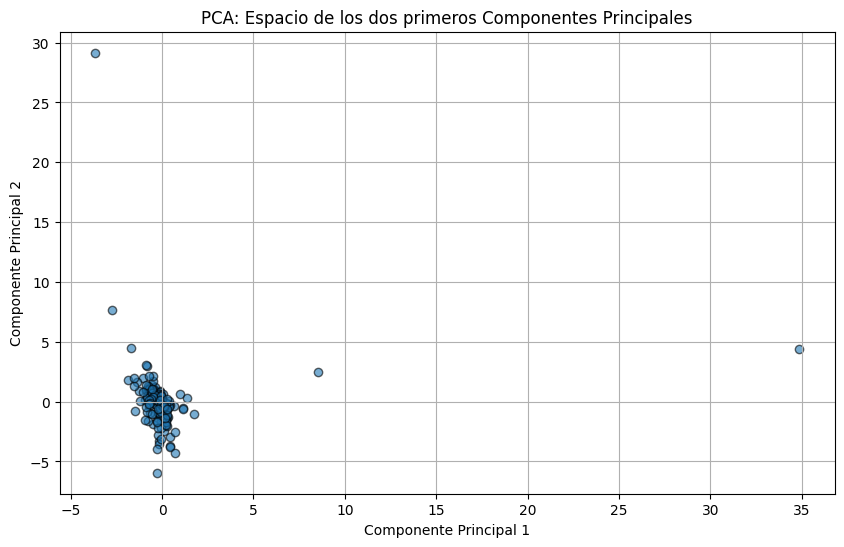

In [ ]:
# Crear un DataFrame con los dos primeros componentes principales
df_pca_result = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])

# Graficar los puntos
plt.figure(figsize=(10, 6))
plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], alpha=0.6, edgecolor='k')
plt.title('PCA: Espacio de los dos primeros Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()
